In [1]:
import pandas as pd
import os
import cv2
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, BatchNormalization, GlobalMaxPooling2D, GlobalAveragePooling2D
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16
import keras
import tensorflow_addons as tfa
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Dataset
Brain Tumor Classification
Class:
1. Glioma Tumor = 901 Image
2. Meningioma Tumor = 913 Image
3. Normal = 438 Image
4. Pituitary Tumor = 844 Image

Image size = 256 x 256

https://www.kaggle.com/datasets/thomasdubail/brain-tumors-256x256

In [ ]:
import random
import shutil

# Change path value according to your dataset path
dataset_path = r"[Insert dataset path here]"
train_path = r"[Insert desired training data path here]"
test_path = r"[Insert desired testing data path here]"

# Creating Directory

In [ ]:

os.makedirs(train_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

train_ratio = 0.8

for class_folder in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_folder)
    images = os.listdir(class_path)
    random.shuffle(images)

    # Calculate the split index
    split_index = int(train_ratio * len(images))

    # Split the images into training and testing sets
    train_images = images[:split_index]
    test_images = images[split_index:]

    # Create class folders in the training and testing directories
    train_class_path = os.path.join(train_path, class_folder)
    test_class_path = os.path.join(test_path, class_folder)
    os.makedirs(train_class_path, exist_ok=True)
    os.makedirs(test_class_path, exist_ok=True)

    # Move images to the respective class folders in training and testing
    for image in train_images:
        src = os.path.join(class_path, image)
        dest = os.path.join(train_class_path, image)
        shutil.copy(src, dest)

    for image in test_images:
        src = os.path.join(class_path, image)
        dest = os.path.join(test_class_path, image)
        shutil.copy(src, dest)

In [4]:
main_datagen=ImageDataGenerator(rescale=1./255., validation_split = 0.2)
test_datagen=ImageDataGenerator(rescale=1./255.)

In [5]:
train_generator = main_datagen.flow_from_directory(train_path, 
                                                    target_size=(224,224),
                                                    subset='training')

val_generator = main_datagen.flow_from_directory(train_path, 
                                                    target_size=(224,224),
                                                    subset='validation')

test_generator = test_datagen.flow_from_directory(test_path, 
                                                    target_size=(224,224))

Found 1980 images belonging to 4 classes.
Found 495 images belonging to 4 classes.
Found 621 images belonging to 4 classes.


# Creating Model

In [6]:
model = Sequential([
            Conv2D(64, (3,3), activation='relu', input_shape=(224,224,3)),
            MaxPool2D((2,2), strides=(2,2)),
            Conv2D(128, (3,3), activation='relu'),
            MaxPool2D((2,2), strides=(2,2)),
            Conv2D(256, (3,3), activation='relu'),
            MaxPool2D((2,2), strides=(2,2)),
            Conv2D(256, (3,3), activation='relu'),
            MaxPool2D((2,2), strides=(2,2)),
            Conv2D(512, (3,3), activation='relu'),
            MaxPool2D((2,2), strides=(2,2)),
            Dropout(0.5),
            Conv2D(512, (3,3), activation='relu'),
            Dropout(0.5),
            GlobalAveragePooling2D(),
            Flatten(),
            Dense(1024, activation='relu'),
            Dropout(0.5),
            Dense(512, activation='relu'),
            Dropout(0.5),
            Dense(4, activation='softmax')
    ])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 256)      0

Epoch 1/100
62/62 [==============================] - 24s 281ms/step - loss: 1.3640 - accuracy: 0.2813 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_score: 0.0000e+00 - val_loss: 1.3503 - val_accuracy: 0.2909 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.0000e+00 - lr: 0.0010
Epoch 2/100
62/62 [==============================] - 12s 188ms/step - loss: 1.3488 - accuracy: 0.2919 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_score: 0.0000e+00 - val_loss: 1.2994 - val_accuracy: 0.4667 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.0000e+00 - lr: 0.0010
Epoch 3/100
62/62 [==============================] - 12s 189ms/step - loss: 1.2919 - accuracy: 0.3616 - precision: 0.3960 - recall: 0.0202 - f1_score: 0.0526 - val_loss: 1.2432 - val_accuracy: 0.4465 - val_precision: 0.4000 - val_recall: 0.0040 - val_f1_score: 0.0133 - lr: 0.0010
Epoch 4/100
62/62 [==============================] - 12s 190ms/step - loss: 1.2318 - accuracy: 0.3778 - preci

62/62 [==============================] - ETA: 0s - loss: 0.2164 - accuracy: 0.9242 - precision: 0.9280 - recall: 0.9182 - f1_score: 0.9286Restoring model weights from the end of the best epoch: 21.

Epoch 24: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.
62/62 [==============================] - 13s 206ms/step - loss: 0.2164 - accuracy: 0.9242 - precision: 0.9280 - recall: 0.9182 - f1_score: 0.9286 - val_loss: 0.5406 - val_accuracy: 0.8242 - val_precision: 0.8407 - val_recall: 0.8101 - val_f1_score: 0.8228 - lr: 7.8125e-06
Epoch 24: early stopping
20/20 [==============================] - 2s 80ms/step - loss: 0.3740 - accuracy: 0.8599 - precision: 0.8713 - recall: 0.8502 - f1_score: 0.8669
accuracy: 85.99033951759338
precision: 87.12871074676514
recall: 85.02415418624878
f1_score: 86.69407367706299


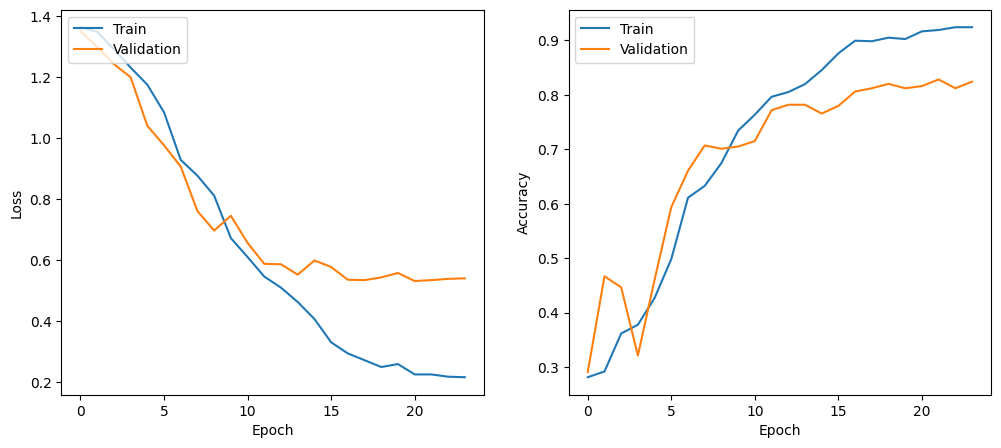

In [8]:
model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics = ['accuracy', keras.metrics.Precision(), keras.metrics.Recall(), tfa.metrics.F1Score(num_classes=4, average='macro', threshold=0.5)])

es=tf.keras.callbacks.EarlyStopping( monitor="val_loss", patience=3,
                                     verbose=1,  restore_best_weights=True)
rlronp=tf.keras.callbacks.ReduceLROnPlateau( monitor="val_loss", factor=0.5, patience=1,
                                             verbose=1)
callbacks=[es, rlronp]
    
EPOCHS = 100
model_history = model.fit(train_generator, epochs=EPOCHS, validation_data = val_generator, callbacks=callbacks, verbose=1)
scores = model.evaluate(test_generator)
print(f"{model.metrics_names[1]}: {scores[1] * 100}")
print(f"{model.metrics_names[2]}: {scores[2] * 100}")
print(f"{model.metrics_names[3]}: {scores[3] * 100}")
print(f"{model.metrics_names[4]}: {scores[4] * 100}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(model_history.history['loss'], label='loss')
plt.plot(model_history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(model_history.history['accuracy'], label='accuracy')
plt.plot(model_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model.save(r"C:\Insert\Your\Model\Save\Path\Here\modelName.h5")